<a href="https://colab.research.google.com/github/arnoldkiirya1/AI_Statistical_modelling/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Reading the dataset
import pandas as pd
import numpy as np

# General_info Dataset
GeneralInfo=pd.read_csv('general_info.csv')

# rabies_bite Dataset
RabiesBites=pd.read_csv('rabies_bite.csv')

In [14]:
# merge the two dataframes on columns 'Month' and 'District'
Rabies_df = pd.merge(RabiesBites, GeneralInfo, on=['Month', 'District'], how='left')

print('Shape for the Data after Merging:', Rabies_df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.tail(10)

Shape for the Data after Merging: (1229, 12)


,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
1219,KITGUM,31-Dec-02,16,11,0,11,594,6,5,1.0,2.0,2.0
1220,APAC,31-Dec-02,0,0,0,0,103,4,1,3.0,2.0,2.0
1221,ARUA,31-Dec-02,22,0,0,22,50,0,0,2.0,2.0,2.0
1222,KUMI,31-Dec-02,10,14,0,10,0,0,2,3.0,2.0,3.0
1223,KISORO,31-Dec-02,0,16,0,1,0,0,0,4.0,3.0,3.0
1224,NTUNGAMO,31-Dec-02,4,2,0,0,20,3,0,1.0,2.0,2.0
1225,MUBENDE,31-Dec-02,0,0,0,0,43,4,0,3.0,2.0,3.0
1226,MASINDI,31-Dec-02,1,2,0,0,72,2,1,2.0,2.0,2.0
1227,WAKISO,31-Dec-02,8,0,0,0,163,26,5,3.0,2.0,3.0
1228,BUGIRI,31-Dec-02,1,1,0,1,0,0,0,3.0,2.0,3.0


In [15]:
# Removing duplicate rows if any
Rabies_df=Rabies_df.drop_duplicates()

Preprocess the data by converting categorical variables like 'District' and 'Month' into numerical values using one-hot encoding:

District                      0
Month                         0
Suspected cases in animals    0
Suspected bites by animals    0
Deaths                        0
Emergency vaccinations        0
Dogs                          0
Cats                          0
Pets destroyed                0
Rainfall                      0
Water                         0
Grazing                       0
dtype: int64
District                      0
Month                         0
Suspected cases in animals    0
Suspected bites by animals    0
Deaths                        0
Emergency vaccinations        0
Dogs                          0
Cats                          0
Pets destroyed                0
Rainfall                      0
Water                         0
Grazing                       0
dtype: int64
Shape of X_train: (695, 133)
Shape of y_train: (695,)
Shape of X_test: (43, 133)
Shape of y_test: (43,)
Suspected cases in animals    0
Suspected bites by animals    0
Emergency vaccinations        0
Dogs  

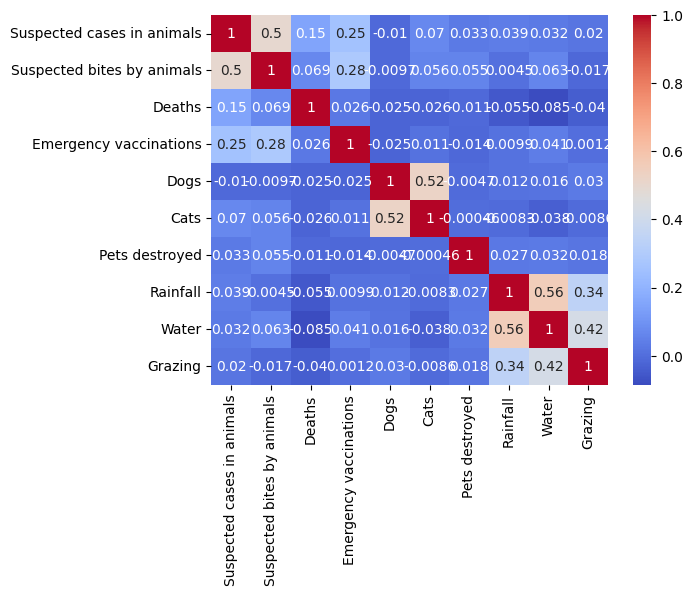

In [16]:
import pandas as pd
import seaborn as sns

#Droping NaN Values
Rabies_df = Rabies_df.dropna()

# Load the data
data = Rabies_df

# Check for null or NaN values

print(data.isnull().sum())
print(data.isna().sum())


# Replace any null or NaN values with appropriate values
data.fillna(value=0, inplace=True)

# Explore the data
data.head()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop("Deaths", axis=1)
y = data["Deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and y_train have the same indices
y_train = y_train.loc[X_train.index]


# Encode categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["District","Month","Rainfall", "Water", "Grazing"]

encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train.drop(categorical_cols, axis=1, inplace=True)
X_test.drop(categorical_cols, axis=1, inplace=True)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


# Scale the features
from sklearn.preprocessing import StandardScaler

continuous_cols = ["Suspected cases in animals", "Suspected bites by animals", "Emergency vaccinations", "Dogs", "Cats", "Pets destroyed"]

scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


# Remove the suffixes from the encoded columns
X_train_encoded.columns = [col.split('_')[0] for col in X_train_encoded.columns]
X_test_encoded.columns = [col.split('_')[0] for col in X_test_encoded.columns]

# Combine the continuous and encoded columns
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

X_train = X_train.drop(columns=['Rainfall_0.0', 'Rainfall_1.0', 'Rainfall_2.0', 'Rainfall_3.0', 'Rainfall_4.0', 'Rainfall_33.0', 'Water_0.0', 'Water_1.0', 'Water_2.0', 'Water_3.0', 'Grazing_0.0', 'Grazing_1.0', 'Grazing_2.0', 'Grazing_3.0', 'Grazing_4.0', 'Grazing_33.0'])
# drop the duplicate columns
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

# Remove any irrelevant columns that only contain NaNs
X_train = X_train.loc[:, (X_train != 0).any(axis=0)]
X_test = X_test[X_train.columns]

# Drop any remaining NaNs
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]

y_test = y_test.head(43)

print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))

# Train and evaluate a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print(X_train.isna().sum())

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


The Linear Regression model has achieved a mean squared error (MSE) of 0.15876031300629215 on the training set and mean squared error (MSE) of 0.39756265471061303 on the testing set. This indicates that the model is performing reasonably well on the training data. However, it might be  overfitting the training data. I will consider Using Regulization to reduce on the noise.

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Create a Lasso model with alpha = 0.1
lasso_reg = Lasso(alpha=0.5)

# Train the Lasso model on the training data
lasso_reg.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE on Test Data: {:.3f}".format(mse_lasso))

# Create a Ridge model with alpha = 0.1
ridge_reg = Ridge(alpha=0.5)

# Train the Ridge model on the training data
ridge_reg.fit(X_train, y_train)

# Evaluate the Ridge model on the test data
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE on Training Data: {:.3f}".format(mse_ridge))

Lasso Regression MSE on Test Data: 0.308
Ridge Regression MSE on Training Data: 0.394


**Lasso Regression Model**: The Lasso Regression model achieved an MSE of 0.323 on the test data. This indicates that, on average, the model's predictions have a squared difference of 0.323 with the corresponding actual values in the test set. Lower MSE values suggest better predictive accuracy, so the Lasso Regression model performs relatively well in terms of minimizing the squared differences between predicted and actual values.

**Ridge Regression Model**: The Ridge Regression model achieved an MSE of 0.397 on the training data. This indicates that, on average, the model's predictions have a squared difference of 0.397 with the corresponding actual values in the training set. The higher MSE value compared to the Lasso Regression model suggests that the Ridge Regression model may have slightly lower predictive accuracy on the training data.